In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
data = pd.read_csv('data/data.csv')
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


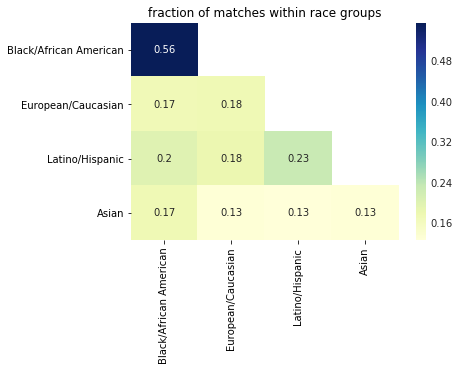

In [76]:
race_features = ['race', 'race_o', 'match']
race_data = data[race_features]
race_exp = race_data[race_data['race'] != 6].dropna()
race_match = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
race_count = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
for row in race_exp.iterrows():
    race = row[1]['race'] 
    race_o = row[1]['race_o']
    match = row[1]['match']
    if ((race != 6.0) & (race != 5.0) & (race_o != 5.0) & (race_o != 6.0)):
        race_match[race][race_o] += match
        race_count[race][race_o] += 1
race_match_df = np.divide(pd.DataFrame.from_dict(race_match), pd.DataFrame.from_dict(race_count))
race_match_df.columns = ['Black/African American', 'European/Caucasian', 'Latino/Hispanic', 'Asian']
mask = np.zeros_like(race_match_df)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
ax = plt.axes()
with sns.axes_style("white"):
    sns.heatmap(race_match_df, mask=mask, annot=True, cmap="YlGnBu", yticklabels = race_match_df.columns)

ax.set_title('fraction of matches within race groups')
plt.show()

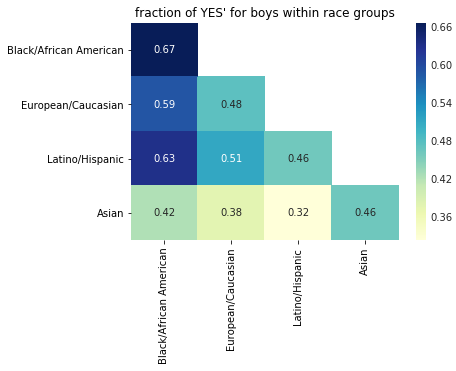

In [74]:
race_features = ['race', 'race_o', 'dec']
race_data = data[data['gender'] == 1][race_features]
race_exp = race_data[race_data['race'] != 6].dropna()
race_match = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
race_count = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
for row in race_exp.iterrows():
    race = row[1]['race'] 
    race_o = row[1]['race_o']
    match = row[1]['dec']
    if ((race != 6.0) & (race != 5.0) & (race_o != 5.0) & (race_o != 6.0)):
        race_match[race][race_o] += match
        race_count[race][race_o] += 1
race_match_df = np.divide(pd.DataFrame.from_dict(race_match), pd.DataFrame.from_dict(race_count))
race_match_df.columns = ['Black/African American', 'European/Caucasian', 'Latino/Hispanic', 'Asian']
mask = np.zeros_like(race_match_df)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
ax = plt.axes()
with sns.axes_style("white"):
    sns.heatmap(race_match_df, mask=mask, annot=True, cmap="YlGnBu", yticklabels = race_match_df.columns)

ax.set_title('fraction of YES\' for boys within race groups')
plt.show()

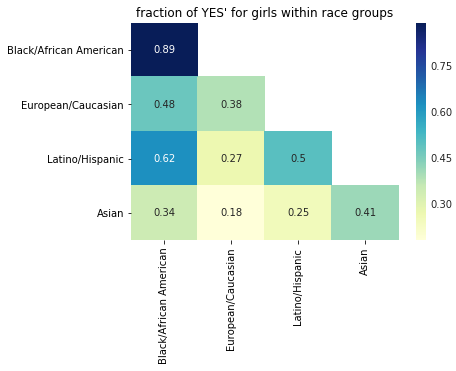

In [75]:
race_features = ['race', 'race_o', 'dec']
race_data = data[data['gender'] == 0][race_features]
race_exp = race_data[race_data['race'] != 6].dropna()
race_match = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
race_count = {1.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              2.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              3.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0},
              4.0 : {1.0 : 0, 2.0 : 0, 3.0 : 0, 4.0 : 0}}
for row in race_exp.iterrows():
    race = row[1]['race'] 
    race_o = row[1]['race_o']
    match = row[1]['dec']
    if ((race != 6.0) & (race != 5.0) & (race_o != 5.0) & (race_o != 6.0)):
        race_match[race][race_o] += match
        race_count[race][race_o] += 1
race_match_df = np.divide(pd.DataFrame.from_dict(race_match), pd.DataFrame.from_dict(race_count))
race_match_df.columns = ['Black/African American', 'European/Caucasian', 'Latino/Hispanic', 'Asian']
mask = np.zeros_like(race_match_df)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
ax = plt.axes()
with sns.axes_style("white"):
    sns.heatmap(race_match_df, mask=mask, annot=True, cmap="YlGnBu", yticklabels = race_match_df.columns)

ax.set_title('fraction of YES\' for girls within race groups')
plt.show()

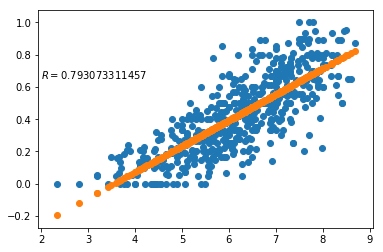

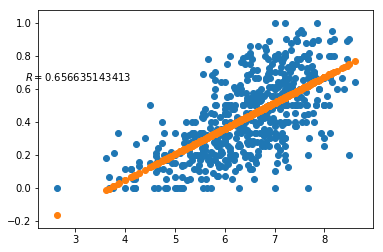

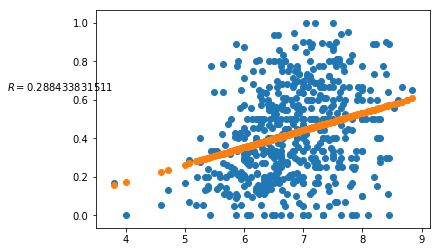

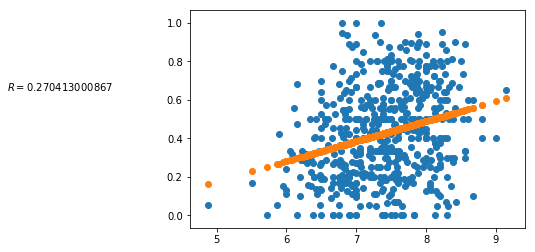

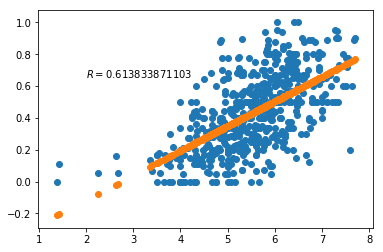

In [77]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
def linreg(col):
    mean_attr = data.groupby('pid')[col].mean()
    dec_attr = data.groupby('pid')['dec'].mean()
    lm = linear_model.LinearRegression()
    lm = lm.fit(mean_attr.reshape(-1,1), dec_attr.reshape(-1, 1))
    pred = lm.predict(mean_attr.reshape(-1, 1))
    plt.scatter(mean_attr, dec_attr)
    plt.scatter(mean_attr, pred)
    plt.text(2, 0.65, '$R = $' + str(math.sqrt(lm.score(mean_attr.reshape(-1, 1), dec_attr.reshape(-1, 1)))))
    plt.show()

linreg('attr')
linreg('fun')
linreg('amb')
linreg('intel')
linreg('shar')

In [51]:
attributes = ['attr', 'fun','sinc', 'amb', 'intel', 'shar']
other_attributes = [attr + '1_1' for attr in attributes]
partner_ratings = [attr + '_o' for attr in attributes]
attributes.extend(other_attributes)
attributes.extend(partner_ratings)
attributes.extend(['dec', 'id', 'age', 'age_o', 'race', 'race_o'])

In [37]:
features = data[attributes][data['gender'] == 1].dropna()
features = normalize(features.dropna())
target = features['dec']
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = \
train_test_split(features.drop('dec', axis = 1), target, test_size = 0.1)

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split = 100)
clf_fit = clf.fit(features_train, target_train)
pred = clf_fit.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred, target_test)

0.8108882521489972

In [39]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', C=1)
clf = clf.fit(features_train, target_train)
pred= clf.predict(features_test)
accuracy_score(pred, target_test)

0.7822349570200573

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10000)
clf = clf.fit(features_train, target_train)
pred= clf.predict(features_test)
accuracy_score(pred, target_test)

0.8452722063037249

In [53]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators = 10000)
clf = clf.fit(features_train, target_train)
pred = clf.predict(features_test)
accuracy_score(pred, target_test)

0.839541547277937

In [49]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 60)
clf = clf.fit(features_train, target_train)
pred = clf.predict(features_test)
accuracy_score(pred, target_test)

0.7851002865329513

In [103]:
clf.predict([[8, 3,5,8,1,4, 20, 0, 5, 5, 70, 0, 20, 20, 1]])

array([1])

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(1000, 1000))
clf = clf.fit(features_train, target_train)
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)
accuracy_score(pred, target_test)

In [24]:
attributes = ['attr', 'fun', 'amb', 'intel', 'shar']
other_attributes = [attr + '1_1' for attr in attributes]
partner_ratings = [attr + '_o' for attr in attributes]
attributes.extend(other_attributes)
attributes.extend(['dec', 'id'])
attributes.extend(partner_ratings)
male_data = data[data['gender'] == 1]

In [26]:
male = normalize(male_data[attributes].dropna())
attr_desire = male[male['dec'] == 1].groupby('id')['attr'].mean()

In [14]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

ValueError: max must be larger than min in range parameter.

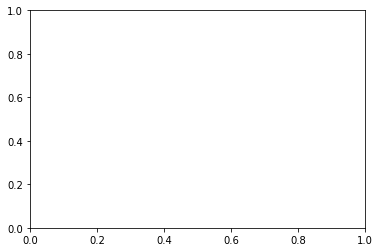

In [62]:
by_person = data[["iid", "dec", "match"]].groupby("iid").aggregate("sum")
#decisions = np.array(by_person["dec"], dtype=np.float)
#matches = np.array(by_person["match"], dtype=np.float)
by_person["success_rate"] = [0]*len(by_person['dec'])

by_person['success_rate'] = by_person['match']/by_person['dec']
by_person.fillna(0)
plt.hist(by_person['success_rate'])


#plt.hist(success_rate)
#plt.title("Success Rate")
#plt.xlabel("")
#success_rate